# Spherical harmonic transforms for winds

In [1]:
%config IPCompleter.greedy = True
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2
    
import warnings
warnings.filterwarnings("ignore")

import senpy as sp

import numpy  as np
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt

from xspharm import xspharm

plt.style.use('science')

## Load 300-hPa wind fields from ERA5 reanagsis

In [2]:
# era_ds = sp.ERA5_onelevel_vars(vars=['u10', 'v10']).mean('time').load()
uv_ds = sp.ERA5_pressuelevel_vars(vars=['u', 'v']).sel(lev=300).mean('time').load()
uv_ds

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    lev      int32 300
Data variables:
    u        (lat, lon) float32 -0.01455 -0.01455 -0.01455 ... 0.01066 0.01066
    v        (lat, lon) float32 -0.01586 -0.01586 -0.01586 ... 0.005091 0.005091

## streamfunction and velocity potential

In [3]:
Xsp = xspharm(uv_ds)
sfvp_ds = Xsp.uv2sfvp(uv_ds.u, uv_ds.v)
sfvp_ds

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    lev      int32 300
Data variables:
    sf       (lat, lon) float32 -1.288e+08 -1.288e+08 ... 1.072e+08 1.072e+08
    vp       (lat, lon) float32 -3.441e+05 -3.441e+05 ... 1.061e+05 1.061e+05

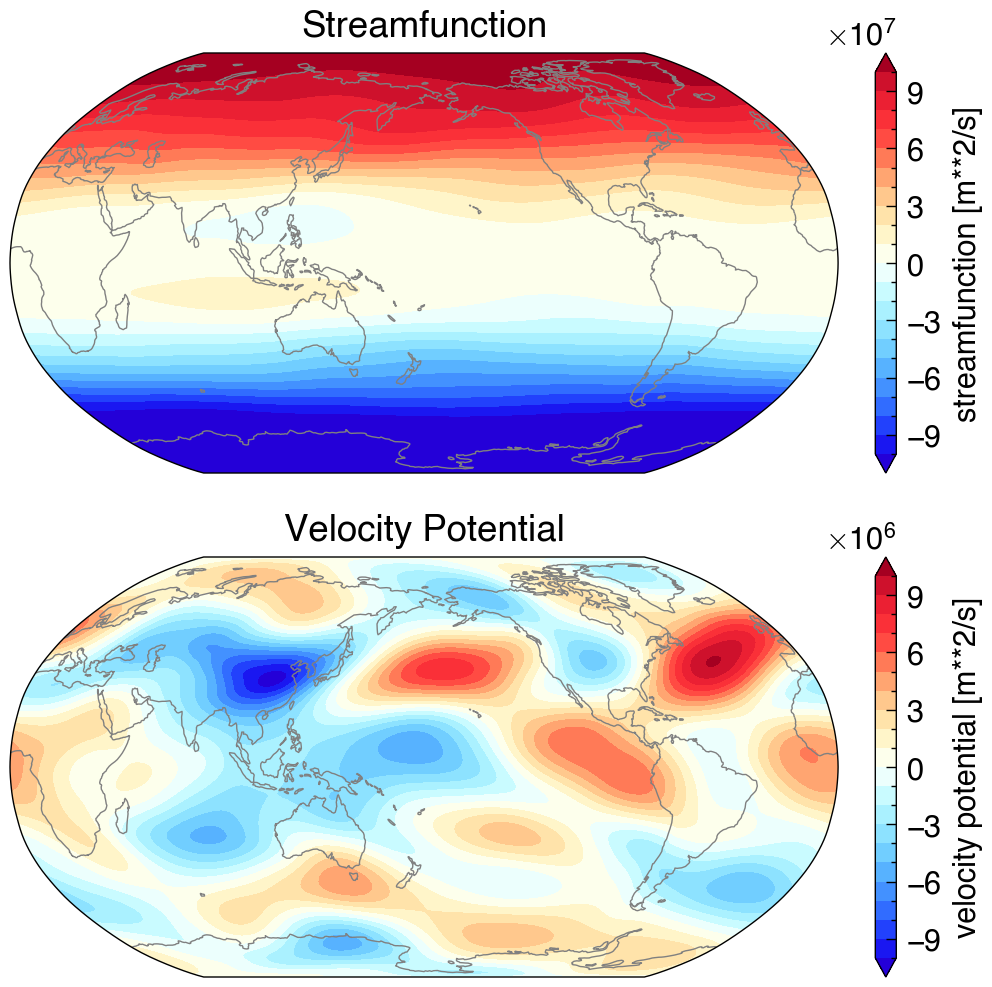

In [4]:

fig, axes = sp.map_subplots(2, 1, figsize=(12, 6), proj='robin', lon_0=180, aspect=1)

group_ds = [sfvp_ds['sf'], sfvp_ds['vp']] #(sfvp_ds['sf']-sfvp_ds['sf'].mean('lon'))

group_titles = ['Streamfunction', 'Velocity Potential']
group_clevs = [ np.arange(-10, 10.01, step=1)*1e7, np.arange(-10, 10.01, step=1)*1e6]

for i, ax in enumerate(axes.flat):
    sp.add_cyclic_point(group_ds[i], dim='lon').plot.contourf(ax=axes[i], transform=sp.data_crs, **sp.cmap.dict_cmap_contourf(levels=group_clevs[i], extend='both', add_norm=False), cbar_kwargs={'pad': 0.02})
    ax.set_title(group_titles[i])
    sp.map_coastline(ax)


## vorticity and divergence

In [5]:
vordiv_ds = Xsp.uv2vordiv(uv_ds.u, uv_ds.v)
vordiv_ds

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    lev      int32 300
Data variables:
    vor      (lat, lon) float32 3.682e-06 3.682e-06 ... -9.64e-06 -9.64e-06
    div      (lat, lon) float32 5.856e-07 5.856e-07 ... -1.819e-07 -1.819e-07

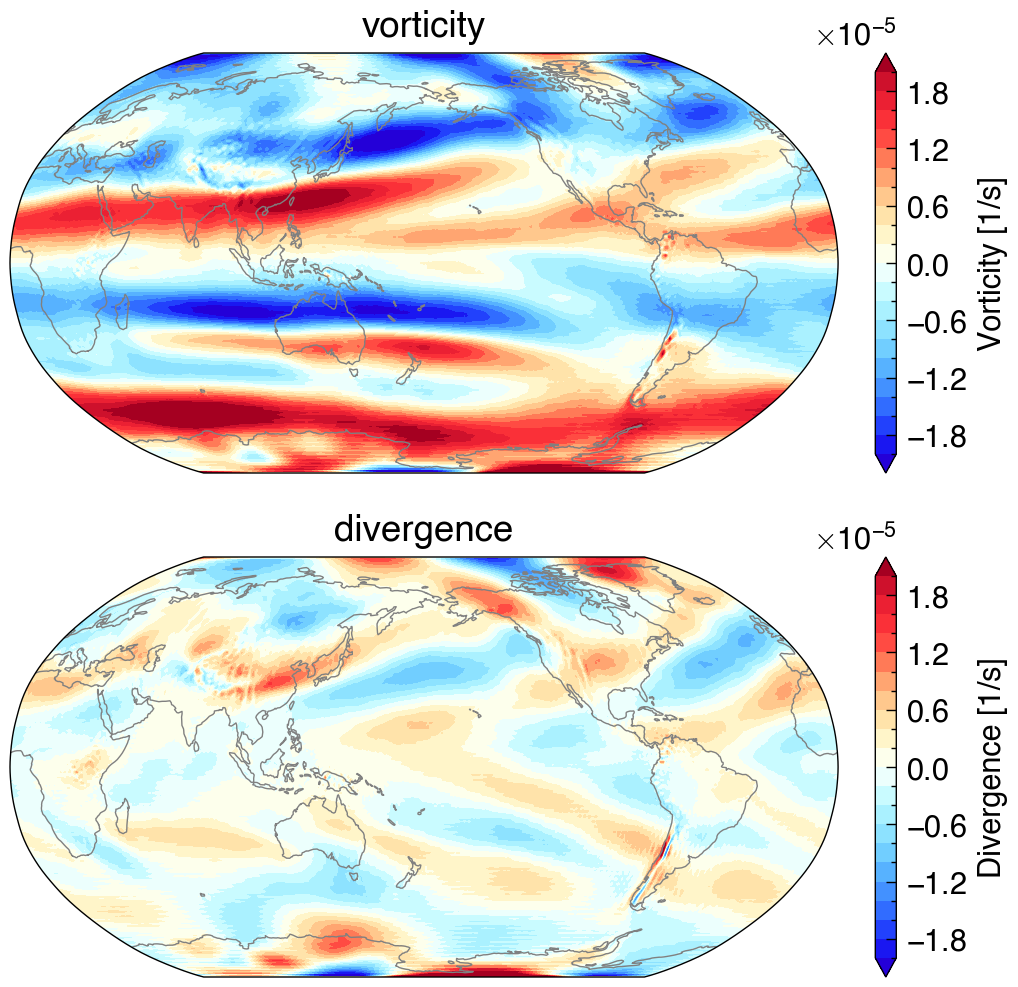

In [6]:

fig, axes = sp.map_subplots(2, 1, figsize=(12, 6), proj='robin', lon_0=180, aspect=1)
group_ds = [vordiv_ds['vor'], vordiv_ds['div']] #(sfvp_ds['sf']-sfvp_ds['sf'].mean('lon'))

group_titles = ['vorticity', 'divergence']
group_clevs = [ np.arange(-10, 10.01, step=1)*2e-6, np.arange(-10, 10.01, step=1)*2e-6]

for i, ax in enumerate(axes.flat):
    sp.add_cyclic_point(group_ds[i], dim='lon').plot.contourf(ax=axes[i], transform=sp.data_crs, **sp.cmap.dict_cmap_contourf(levels=group_clevs[i], extend='both', add_norm=False), cbar_kwargs={'pad': 0.02})
    ax.set_title(group_titles[i])
    sp.map_coastline(ax)
